# PREDICTION OF 2022/2023 ALL-NBA TEAMS

## 1. INTRODUCTION

### 1.1. Context

The **National Basketball Association** (**NBA**) was formed in 1946. The league is composed of **30 teams**, 29 from the USA and 1 from Canada. There are 15 teams in the eastern conference and 15 teams in the western conference. Each team plays **82 regular season games** then the best 8 teams from each conference compete in the playoffs to determine which team is awarded Larry O'Brien Championship Trophy. Over the years, the NBA has been able to expand their marketing to all over the world via global events, implementation of international players from various nations and the creation of the NBA league pass.

The **All-NBA Team** is an annual NBA honour awarded to the 15 best players in the league following every NBA season. There are three teams (**1st**, **2nd** and **3rd**), and each team consists of **two guards**, **two forwards** and **one center**. NBA players receive five points for a first team vote, three points for a second team vote, and one point for a third team vote. The players with the highest point totals at their respective positions make the first team, with the next highest making the second team and so forth. Voting is conducted by a global panel of sportswriters and broadcasters. Considering as the league consists of only **450 players** at a time, being selected among them as an All-NBA player is a prestigious honour. When we compare player’s amongst themselves, we regularly bring their All-NBA selections into the discussion to prove their status and to cement their legacy. Moreover, making an All-NBA team has potential salary bonus implications, therefore it is essential that the selection system is fair, unbiased, and unprejudiced. Unfortunately, very rarely is this the situation. With the intention of avoiding objectivity and quantifying what it takes to be an All-NBA calibre player, I investigated relevant player data and applied machine learning techniques to categorically model this selection process.

This project aims to exhibit my skills of extracting, loading, cleaning, visualising, and forming narratives from data.

### 1.2. Topic selection

The objective of this project was to determine if we could construct a machine learning model using **Python** that assimilates NBA player's pre-All-Star break statistics from the **2022/2023 season** and reliably predict which players will make each of the three All-NBA teams at the end of the season. 

This project focus was selected for a multitude of reasons. Firstly, to allow eager sports fans to potentially find out the current **front runners** of various end of season awards (e.g., **most valuable player**, **rookie of the year**, **sixth man of the year** etc.). Many sports fans are interested in not only their teams’ accolades but also individual accolades of their favourite players. Secondly, another advantage of creating and using this machine learning model is the **potential of monetising** it through its usefulness in providing an advantage in the **betting market**. This market is saturated with betting incentives available for different types of individual awards each season across all sports, therefore targeting this with our model may provide remunerative rewards. Lastly, to base this project purely off individual player statistics will allow us to reduce and potentially **eliminate the heavy influence of team success** in the voting of All-NBA teams.

### 1.3. Project overview
1. **Collect** and **clean** 2022/2023 pre-All-star break player statistics.

2. **Analyse** and **visualise** relationships between statistics to find out which are most vital for our project.

3. **Create**, **trial** and **optimise** our machine learning model to output who will make the 2022/2023 All-NBA teams.


### 1.4. Data sources

* **[NBA Players' 2022/2023 Season Stats from Kaggle](https://www.kaggle.com/datasets/vivovinco/20222023-nba-player-stats-regular)** - This dataset contains a variety of players' game statistics like points, rebounds, assists, FG%, etc.

* **[Glossary of basketball statistics from Basketball Reference](https://www.basketball-reference.com/about/glossary.html)** - List containing all standard and advanced metrics used in this project.


### 1.5. Questions we hope to answer with the data
* Can our model predict whether a player will make an All-NBA team with an **70% accuracy or higher**?

* What standardised and advanced metrics are most important in showing us how effective a player is **offensively**?

* What position is the **most valuable** in the NBA?

### 1.6. Limitations of the dataset
* The dataset **does not show the win/loss record** of each player.

* Individual match data has now been provided therefore **team possessions** (**Tm**), which is a fundamental component for other advanced metrics, is **unable to be calculated**.

* Data is collected from a **third-party provider** (Basketball Reference), therefore it is **not original**.


### 1.7. Tools Used
* **Microsoft Excel**
* **Python** - NumPy, Matplotlib, Pandas and Seaborn

## 2. DATA LOADING

### 2.1. Installation of packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from platform import python_version
print(python_version())

3.9.7


In [3]:
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)

numpy 1.20.3
pandas 1.3.4


### 2.2. Importation of the dataset

In [4]:
# load data
nba = "2022-2023 NBA Player Stats - Regular.csv"
players = pd.read_csv(nba, delimiter=";", encoding="Windows-1252", index_col=0)
pd.set_option('max_columns', None)
players.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,23,TOR,33,9,23.0,4.0,8.2,0.489,0.5,2.2,0.254,3.5,6.0,0.573,0.522,1.9,2.7,0.697,2.1,4.3,6.4,1.1,0.7,0.7,1.2,2.2,10.4
2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
3,Bam Adebayo,C,25,MIA,52,52,35.3,8.6,15.7,0.546,0.0,0.2,0.091,8.5,15.5,0.552,0.547,4.5,5.5,0.806,2.7,7.3,10.1,3.3,1.2,0.8,2.6,2.8,21.6
4,Ochai Agbaji,SG,22,UTA,35,1,14.0,1.5,3.2,0.486,0.7,1.9,0.394,0.8,1.3,0.622,0.604,0.3,0.5,0.625,0.6,1.0,1.6,0.5,0.1,0.1,0.3,1.4,4.1
5,Santi Aldama,PF,22,MEM,52,18,22.0,3.4,7.0,0.486,1.4,3.7,0.374,2.0,3.3,0.610,0.584,1.4,1.9,0.730,1.0,3.7,4.7,1.2,0.7,0.7,0.7,1.9,9.5
6,Nickeil Alexander-Walker,SG,24,TOT,37,3,14.3,2.2,4.6,0.485,0.9,2.4,0.402,1.3,2.3,0.571,0.588,0.7,1.1,0.692,0.2,1.4,1.6,2.1,0.6,0.4,1.2,1.6,6.2
6,Nickeil Alexander-Walker,SG,24,UTA,36,3,14.7,2.3,4.7,0.488,1.0,2.4,0.402,1.3,2.3,0.578,0.591,0.8,1.1,0.692,0.2,1.4,1.6,2.1,0.7,0.4,1.3,1.6,6.3
6,Nickeil Alexander-Walker,SG,24,MIN,1,0,2.0,0.0,1.0,0.000,0.0,0.0,0.000,0.0,1.0,0.000,0.000,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Grayson Allen,SG,27,MIL,52,50,27.5,3.4,7.6,0.443,2.0,4.9,0.403,1.4,2.8,0.514,0.572,1.7,1.9,0.899,0.9,2.5,3.4,2.4,0.8,0.2,1.1,1.6,10.4


These lines prevented several errors and redundancies while loading our data as they reduced the size of our file, leading to faster input speed and smaller storage space used. **Windows-1252** encoding has been used for this data loading process and a semi-colon delimiter has also been utilised. The dataset is ranked alphabetically by surname, so a **Rank** column has been inserted to ensure each players entry is unique.

### 2.3. Statistic definitions 
* **Rk** = Rank
* **Pos** = Position
* **C** = Center
* **PF** = Power Forward
* **SF** = Small Forward
* **SG** = Shooting Guard
* **PG** = Point Guard
* **Tm** = Team
* **G** = Number of games
* **GS** = Number of games started
* **MP** = Average minutes played per game
* **FG** = Average number of field goals made per game
* **FGA** = Average number of field goal attempts per game
* **FG%** = Average percentage of field goals made per game
* **2P** = Average number of two pointers made per game
* **2PA** = Average number of two point attempts per game
* **2P%** = Average percentage of two pointers made per game
* **3P** = Average number of three pointers made per game
* **3PA** = Average number of three point attempts per game
* **3P%** = Average percentage of three pointers made per game
* **eFG%** = Effective field goal percentage
* **FT** = Average number of free throws made per game
* **FTA** = Average number of free throw attempts per game
* **FT%** = Average percentage of free throws made per game
* **ORB** = Average number of offensive rebounds per game
* **DRB** = Average number of defensive rebounds per game
* **TRB** = Average number of total rebounds per game
* **AST** = Average number of assists per game
* **STL** = Average number of steals per game
* **BLK** = Average number of blocks per game
* **TOV** = Average number of turnovers per game
* **PF** = Average number of personal fouls per game
* **PTS** = Average number of points per game



## 3. DATA CLEANING, MANIPULATING AND SPLITTING  

### 3.1. Detection of any missing values

In [5]:
# display column names within the DataFrame
players.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [6]:
# count the number of missing (NaN) values in each column of the DataFrame
missing_values_count = players.isnull().sum()

# select all rows and all columns using the ':' operator
missing_values_count[:]

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [7]:
# display the shape of the DataFrame
players.shape

(553, 29)

### 3.2. Removal of any excess entries

In [8]:
# display all team names within the DataFrame
team_unique = players['Tm'].unique()
print(team_unique)

['TOR' 'MEM' 'MIA' 'UTA' 'TOT' 'MIN' 'MIL' 'CLE' 'NOP' 'ORL' 'NYK' 'WAS'
 'PHO' 'DET' 'GSW' 'CHO' 'SAS' 'SAC' 'LAC' 'OKC' 'LAL' 'DAL' 'IND' 'ATL'
 'CHI' 'DEN' 'BRK' 'BOS' 'POR' 'PHI' 'HOU']


In [9]:
# remove 'TOT' as there are only 30 teams in the NBA
players = players.loc[players['Tm'] != 'TOT']
players.shape

(529, 29)

In [10]:
# remove any player with less than 10 games to reduce number of anomalies aswell as remove duplicate entries
players = players[players['G'] >= 10]
players.shape

(451, 29)

The dataset was checked for any missing values. This check produced a negative result; therefore, this proved the quality of this data is high. While looking through the **Tm** column, I discovered there is a team called **TOT** that we must remove from the dataset as there are only 30 teams in the NBA. I removed all transferred players and fringe rotation from our dataset to increase accuracy and reliability, this was done by updating the **players DataFrame** to only show players who have played 10 or more games. 

### 3.3. Addition of advanced metrics

In [11]:
# add efficiency rating (EFF) to DataFrame
Efficiency = players.PTS + players.TRB + players.AST + players.STL + players.BLK - (players.FGA - players.FG) - (players.FTA - players.FT) - players.TOV
players.insert(29, "EFF", Efficiency.round(1))

# add assist to turnover ratio (AST/TOV) and steal to turnover ratio(STL/TOV) to DataFrame
AssistToTurnoverRatio = players.AST / players.TOV
players.insert(29, "AST/TOV", AssistToTurnoverRatio.round(2))

StealToTurnoverRatio = players.STL / players.TOV
players.insert(29, "STL/TOV", StealToTurnoverRatio.round(2))

# add block to foul ratio (BLK/PF) and steal to foul ratio(STL/PF) to DataFrame
BlockToFoulRatio = players.BLK / players.PF
players.insert(29, "BLK/PF", BlockToFoulRatio.round(2))

StealToFoulRatio = players.STL / players.PF
players.insert(29, "STL/PF", StealToFoulRatio.round(2))

# add assist ratio (AST RATIO) and turnover ratio(TOV RATIO) to DataFrame
AssistRatio = players.AST/(players.FGA + (0.44 * players.FTA) + players.AST + players.TOV)
players.insert(29, "AST RATIO", AssistRatio.round(2))

TurnoverRatio = players.TOV/(players.FGA + (0.44 * players.FTA) + players.AST + players.TOV)
players.insert(29, "TOV RATIO", TurnoverRatio.round(2))

# add floor percentage (FLOOR%) to DataFrame
FloorPercentage = (players.FG + players.ORB)/(players.FGA + players.TOV)
players.insert(29, "FLOOR%", FloorPercentage.round(3))

# add game score(GmSc) and win score (WnSc) to DataFrame
GameScore = players.PTS + (0.4 * players.FG) - (0.7 * players.FGA) -  (0.4 *(players.FTA - players.FT)) + (0.7 * players.ORB) + (0.3 * players.DRB) + players.STL + (0.7 * players.AST) + (0.7 * players.BLK) - (0.4 * players.PF) - players.TOV
players.insert(29, "GmSc", GameScore.round(3))

WinScore = players.PTS + players.TRB + players.STL + (0.5 * players.BLK) + (0.5 * players.AST) - players.FGA - (0.5 * players.FTA) - players.TOV - (0.5 * players.PF)
players.insert(29, "WnSc", WinScore.round(3))

# add points per possession (PPP) to DataFrame
PointsPerPossession = players.PTS / (players.FGA + (0.44 * players.FTA) + players.TOV)
players.insert(29, "PPP", PointsPerPossession.round(1))

# add true scoring percentage (TS%) to DataFrame
TrueScoringPercentage = players.PTS / ((2 * players.FGA) + (0.88 * players.FTA))
players.insert(29, "TS%", TrueScoringPercentage.round(3))

# display the new DataFrame
players.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,PPP,WnSc,GmSc,FLOOR%,TOV RATIO,AST RATIO,STL/PF,BLK/PF,STL/TOV,AST/TOV,EFF
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,23,TOR,33,9,23.0,4.0,8.2,0.489,0.5,2.2,0.254,3.5,6.0,0.573,0.522,1.9,2.7,0.697,2.1,4.3,6.4,1.1,0.7,0.7,1.2,2.2,10.4,0.554,1.0,6.55,8.58,0.649,0.10,0.09,0.32,0.32,0.58,0.92,13.1
2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,0.561,0.9,11.80,10.85,1.073,0.16,0.19,0.39,0.48,0.47,1.21,17.9
3,Bam Adebayo,C,25,MIA,52,52,35.3,8.6,15.7,0.546,0.0,0.2,0.091,8.5,15.5,0.552,0.547,4.5,5.5,0.806,2.7,7.3,10.1,3.3,1.2,0.8,2.6,2.8,21.6,0.596,1.0,12.50,18.08,0.617,0.11,0.14,0.43,0.29,0.46,1.27,26.3
4,Ochai Agbaji,SG,22,UTA,35,1,14.0,1.5,3.2,0.486,0.7,1.9,0.394,0.8,1.3,0.622,0.604,0.3,0.5,0.625,0.6,1.0,1.6,0.5,0.1,0.1,0.3,1.4,4.1,0.599,1.1,1.65,2.76,0.600,0.07,0.12,0.07,0.07,0.33,1.67,4.2
5,Santi Aldama,PF,22,MEM,52,18,22.0,3.4,7.0,0.486,1.4,3.7,0.374,2.0,3.3,0.610,0.584,1.4,1.9,0.730,1.0,3.7,4.7,1.2,0.7,0.7,0.7,1.9,9.5,0.606,1.1,6.25,8.14,0.571,0.07,0.12,0.37,0.37,1.00,1.71,12.0
6,Nickeil Alexander-Walker,SG,24,UTA,36,3,14.7,2.3,4.7,0.488,1.0,2.4,0.402,1.3,2.3,0.578,0.591,0.8,1.1,0.692,0.2,1.4,1.6,2.1,0.7,0.4,1.3,1.6,6.3,0.608,1.0,2.50,4.88,0.417,0.15,0.24,0.44,0.25,0.54,1.62,7.1
7,Grayson Allen,SG,27,MIL,52,50,27.5,3.4,7.6,0.443,2.0,4.9,0.403,1.4,2.8,0.514,0.572,1.7,1.9,0.899,0.9,2.5,3.4,2.4,0.8,0.2,1.1,1.6,10.4,0.616,1.1,5.45,8.62,0.494,0.09,0.20,0.50,0.12,0.73,2.18,11.7
8,Jarrett Allen,C,24,CLE,52,52,33.1,6.2,9.4,0.653,0.0,0.2,0.125,6.1,9.3,0.662,0.654,2.4,3.4,0.709,3.1,6.8,9.9,1.7,0.8,1.2,1.6,2.2,14.7,0.675,1.2,13.05,14.76,0.845,0.11,0.12,0.36,0.55,0.50,1.06,22.5
9,Jose Alvarado,PG,24,NOP,56,9,21.6,3.3,8.1,0.409,1.4,4.1,0.342,1.9,3.9,0.480,0.497,1.2,1.4,0.813,0.4,1.9,2.4,3.1,1.1,0.2,1.4,2.0,9.2,0.528,0.9,3.15,6.83,0.389,0.11,0.23,0.55,0.10,0.79,2.21,9.6


### 3.4. Advanced metric definitions 
* **AST/TOV** = Assist to turnover ratio
* **AST RATIO** = Assist ratio
* **STL/TOV** = Steal to turnover ratio
* **STL/PF** = Steal to personal foul ratio
* **BLK/PF** = Block to personal foul ratio
* **TOV RATIO** = Turnover ratio
* **TS%** = True scoring percentage
* **FLOOR%** = Floor Percentage
* **PPP** = Points per possession
* **EFF** = Efficiency rating 
* **GmSc** = Game score
* **WnSc** = Win score

In [12]:
# display the shape of the DataFrame
players.shape

(451, 41)

### 3.5. Rearrangment columns

In [13]:
# display the information within the DataFrame
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 1 to 505
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     451 non-null    object 
 1   Pos        451 non-null    object 
 2   Age        451 non-null    int64  
 3   Tm         451 non-null    object 
 4   G          451 non-null    int64  
 5   GS         451 non-null    int64  
 6   MP         451 non-null    float64
 7   FG         451 non-null    float64
 8   FGA        451 non-null    float64
 9   FG%        451 non-null    float64
 10  3P         451 non-null    float64
 11  3PA        451 non-null    float64
 12  3P%        451 non-null    float64
 13  2P         451 non-null    float64
 14  2PA        451 non-null    float64
 15  2P%        451 non-null    float64
 16  eFG%       451 non-null    float64
 17  FT         451 non-null    float64
 18  FTA        451 non-null    float64
 19  FT%        451 non-null    float64
 20  ORB       

In [14]:
# rearrange the columns within the DataFrame
pd.set_option('max_columns', None)
players = players[['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PTS', 'FG', 'FGA', 'FG%', '3P','3PA', '3P%',
                   '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 
                   'PF', 'AST/TOV', 'AST RATIO', 'STL/TOV', 'STL/PF', 'BLK/PF', 'TOV RATIO', 'eFG%', 'TS%',
                   'FLOOR%','PPP', 'EFF', 'GmSc', 'WnSc']]

Next, I added several advanced metrics into the **player DataFrame**, these metrics will allow me later to enhance the quality of my analysis and conclusions drawn from this research. After the addition of these metrics, I rearranged the columns of the **players DataFrame**.

### 3.6. Measures of central tendency

In [15]:
# display the total, mean, standard deviation, minimum, 25%, median, 75% and maximum of the data in each column of the DataFrame
players.describe().round(2)

,Age,G,GS,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,AST/TOV,AST RATIO,STL/TOV,STL/PF,BLK/PF,TOV RATIO,eFG%,TS%,FLOOR%,PPP,EFF,GmSc,WnSc
count,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00,451.00
mean,25.91,39.26,18.86,21.22,9.90,3.62,7.68,0.47,1.06,2.97,0.32,2.56,4.71,0.54,1.60,2.05,0.75,0.92,2.88,3.81,2.19,0.65,0.41,1.20,1.82,inf,0.17,inf,0.38,0.22,0.10,0.54,0.57,0.54,0.99,11.25,7.84,4.84
std,4.31,13.04,20.36,9.30,6.99,2.47,5.12,0.09,0.89,2.33,0.12,2.02,3.63,0.10,1.63,1.98,0.15,0.77,1.82,2.42,1.95,0.39,0.40,0.84,0.75,NaN,0.08,NaN,0.24,0.17,0.03,0.08,0.07,0.18,0.14,7.14,5.44,3.42
min,19.00,10.00,0.00,2.40,0.30,0.10,0.50,0.14,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.20,0.30,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.14,0.17,0.20,0.00,-0.39,-0.85
25%,23.00,30.00,1.00,13.90,4.70,1.75,3.80,0.42,0.40,1.20,0.29,1.05,2.10,0.49,0.50,0.70,0.69,0.40,1.55,2.10,0.80,0.30,0.20,0.60,1.30,1.13,0.12,0.37,0.23,0.11,0.08,0.50,0.53,0.43,0.90,5.90,3.80,2.35
50%,25.00,42.00,9.00,21.10,8.10,3.10,6.40,0.46,0.90,2.60,0.34,1.90,3.60,0.54,1.10,1.40,0.77,0.70,2.40,3.30,1.50,0.60,0.30,1.00,1.80,1.67,0.16,0.57,0.33,0.18,0.10,0.54,0.57,0.49,1.00,9.60,6.40,4.15
75%,29.00,50.00,40.00,29.70,13.10,4.80,10.45,0.51,1.60,4.40,0.39,3.55,6.40,0.59,2.00,2.70,0.84,1.20,3.70,4.80,2.95,0.90,0.50,1.60,2.30,2.28,0.22,0.82,0.46,0.29,0.12,0.58,0.61,0.60,1.10,15.05,10.46,6.43
max,38.00,59.00,59.00,37.60,33.40,11.60,22.80,0.86,4.90,11.40,1.00,10.70,18.20,0.86,10.00,13.10,1.00,5.10,9.90,12.30,10.80,2.10,3.30,4.20,3.90,inf,0.44,inf,2.75,1.08,0.35,0.86,0.80,1.45,1.30,38.10,26.85,19.95


This table summarises the **total**, **mean**, **standard deviation**, **minimum**, **25%**, **median**, **75%** and **maximum** of each column in this dataset. Key findings include:
* The average age of players this season so far is **25.9 years**, showing that older and experienced players are typically playing more minutes than rookies and other prospects. The median age at **25.0 years** is slightly lower than the average age, as there are mavericks such as **LeBron James** and **PJ Tucker** playing large amounts of minutes as league veterans in such a physically demanding sport.

* There are huge differences in the standard deviation compared to the mean in statistics such as **2P%**, **3P%**, **FG%**, **FT%**, **eFG%** and **TS%**, a difference of **0.2 or higher** in each. These are as expected as basketball is considered an erratic sport. Star players have the most plays drawn up and designed for them, therefore role players are put into tough positions where usually they are forced into a low percentage shot. As well as simply a lot of players in the league not being able to shoot at a high level.

* There was a difference of **20.3** between the 75 percentile and the maximum of **PTS** in this dataset. This exhibits how much of the offensive load starters and the best players in the league must be prepared to carry for their team to be successful.

* The minimum **win score** being a negative number at **-0.85** proves that it is capable for a player to be a detriment to their teams’ success.

### 3.7. Split players into positional catergories 

In [16]:
# split the DataFrame into position catergories 
players_C = players[players.Pos == "C"]
players_PF = players[players.Pos == "PF"]
players_SF = players[players.Pos == "SF"]
players_SG = players[players.Pos == "SG"]
players_PG = players[players.Pos == "PG"]
players_C.head(10)

,Player,Pos,Age,Tm,G,GS,MP,PTS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,AST/TOV,AST RATIO,STL/TOV,STL/PF,BLK/PF,TOV RATIO,eFG%,TS%,FLOOR%,PPP,EFF,GmSc,WnSc
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,23,TOR,33,9,23.0,10.4,4.0,8.2,0.489,0.5,2.2,0.254,3.5,6.0,0.573,1.9,2.7,0.697,2.1,4.3,6.4,1.1,0.7,0.7,1.2,2.2,0.92,0.09,0.58,0.32,0.32,0.10,0.522,0.554,0.649,1.0,13.1,8.58,6.55
2,Steven Adams,C,29,MEM,42,42,27.0,8.6,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,1.21,0.19,0.47,0.39,0.48,0.16,0.597,0.561,1.073,0.9,17.9,10.85,11.80
3,Bam Adebayo,C,25,MIA,52,52,35.3,21.6,8.6,15.7,0.546,0.0,0.2,0.091,8.5,15.5,0.552,4.5,5.5,0.806,2.7,7.3,10.1,3.3,1.2,0.8,2.6,2.8,1.27,0.14,0.46,0.43,0.29,0.11,0.547,0.596,0.617,1.0,26.3,18.08,12.50
8,Jarrett Allen,C,24,CLE,52,52,33.1,14.7,6.2,9.4,0.653,0.0,0.2,0.125,6.1,9.3,0.662,2.4,3.4,0.709,3.1,6.8,9.9,1.7,0.8,1.2,1.6,2.2,1.06,0.12,0.50,0.36,0.55,0.11,0.654,0.675,0.845,1.2,22.5,14.76,13.05
17,Deandre Ayton,C,24,PHO,49,49,30.0,18.6,8.1,13.7,0.589,0.1,0.5,0.304,7.9,13.2,0.599,2.3,3.1,0.732,2.9,7.3,10.2,2.1,0.5,0.7,2.0,2.8,1.05,0.11,0.25,0.18,0.25,0.10,0.594,0.617,0.701,1.1,23.7,15.49,12.05
18,Udoka Azubuike,C,23,UTA,22,0,5.5,1.8,0.9,1.0,0.864,0.0,0.0,0.000,0.9,1.0,0.864,0.1,0.3,0.333,0.5,1.4,1.8,0.3,0.1,0.3,0.3,0.5,1.00,0.17,0.33,0.20,0.60,0.17,0.864,0.795,1.077,1.3,3.7,2.17,2.30
19,Marvin Bagley III,C,23,DET,25,13,21.3,10.6,4.3,8.0,0.537,0.4,1.3,0.273,4.0,6.7,0.589,1.6,2.1,0.769,2.1,3.8,5.9,0.6,0.5,0.7,0.9,2.0,0.67,0.06,0.56,0.25,0.35,0.09,0.560,0.594,0.719,1.1,13.2,8.84,6.70
22,Mo Bamba,C,24,ORL,40,6,17.0,7.3,2.7,5.4,0.495,1.1,2.7,0.398,1.6,2.7,0.594,0.9,1.3,0.686,1.2,3.4,4.6,1.1,0.3,1.0,0.6,2.2,1.83,0.14,0.50,0.14,0.45,0.08,0.596,0.611,0.650,1.1,10.6,6.59,5.50
31,Charles Bassey,C,22,SAS,24,1,13.6,4.7,2.0,2.9,0.671,0.1,0.3,0.333,1.9,2.7,0.703,0.7,1.0,0.667,1.8,3.4,5.2,1.2,0.3,0.9,1.2,2.1,1.00,0.21,0.25,0.14,0.43,0.21,0.686,0.704,0.927,1.0,9.9,5.36,5.60


The data was then split into positional categories (**C**, **PF**, **SF**, **SG** and **PG**), so that I could contour which statistics are most important at proving how impactful a player is in each position.

## 4. DATA VISUALISATION AND ANALYSIS
### 4.1. Average minutes per game for each position

In [17]:
# display the mean minutes per game of players for each position 
print("Average Center MP: " + "\033[1m" + str(round(players_C.MP.mean(), 1)) + "\033[0m")  
print("Average Power Forward MP: " + "\033[1m" + str(round(players_PF.MP.mean(), 1)) + "\033[0m") 
print("Average Small Forward MP: " + "\033[1m" + str(round(players_SF.MP.mean(), 1)) + "\033[0m")
print("Average Shooting Guard MP: " + "\033[1m" + str(round(players_SG.MP.mean(), 1)) + "\033[0m")  
print("Average Point Guard MP: " + "\033[1m" + str(round(players_PG.MP.mean(), 1)) + "\033[0m")  

Average Center MP: 18.8
Average Power Forward MP: 21.4
Average Small Forward MP: 22.2
Average Shooting Guard MP: 21.3
Average Point Guard MP: 22.6


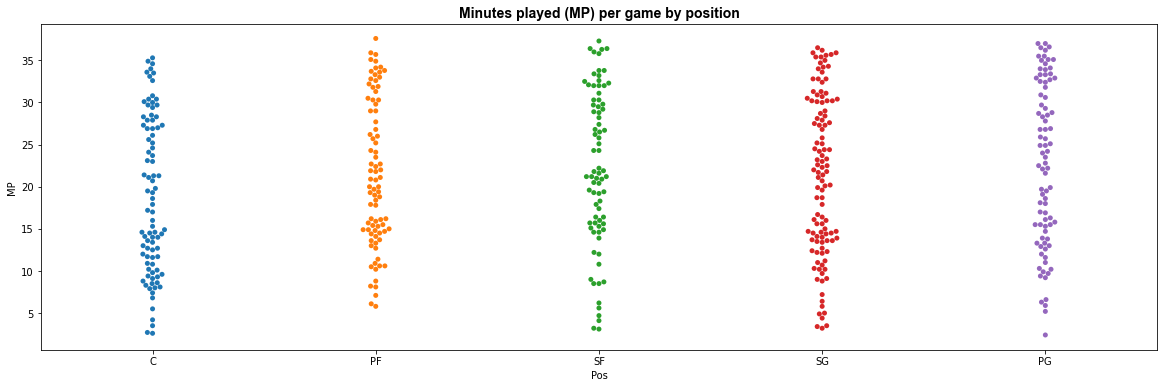

In [18]:
# create a swarmplot of minutes per game of players for each position 
plt.figure(figsize=(20,6))
sns.swarmplot(x=players["Pos"],
y=players["MP"],
order=['C','PF','SF','SG','PG'])   
plt.title("Minutes played (MP) per game by position", fontsize=14, fontname='Arial', weight='bold')
plt.show()

The **average minutes** played per game between the **PF**, **SF**, **SG** and **PG** positions ranged from **21.4 to 22.6**, this clustered set of results were expected. However, the average MP played by **C’s** this season was as low as **18.8**. I believe that this is mainly due to centers having stamina issues as they are larger in size and mass, as well as the incorporation of the modern small ball tactic, which is simply line-ups without a center to focus on reaping the rewards of three point shooting. This raises questions on whether we can we even consider top players in this position as valuable as others in different positions as they are unable to stay on the court for as long, or in some tactic scenarios not even required. Our swarm plot is spread very evenly across all 5 positions with no real anomalies as star players and starters play more minutes across the league.

### 4.2. Average points per game for each position

In [19]:
# display the mean points per game of players for each position 
print("Average Center PTS: " + "\033[1m" + str(round(players_C.PTS.mean(), 1)) + "\033[0m")  
print("Average Power Forward PTS: " + "\033[1m" + str(round(players_PF.PTS.mean(), 1)) + "\033[0m") 
print("Average Small Forward PTS: " + "\033[1m" + str(round(players_SF.PTS.mean(), 1)) + "\033[0m")
print("Average Shooting Guard PTS: " + "\033[1m" + str(round(players_SG.PTS.mean(), 1)) + "\033[0m")  
print("Average Point Guard PTS: " + "\033[1m" + str(round(players_PG.PTS.mean(), 1)) + "\033[0m")  

Average Center PTS: 8.7
Average Power Forward PTS: 9.5
Average Small Forward PTS: 10.1
Average Shooting Guard PTS: 10.2
Average Point Guard PTS: 11.0


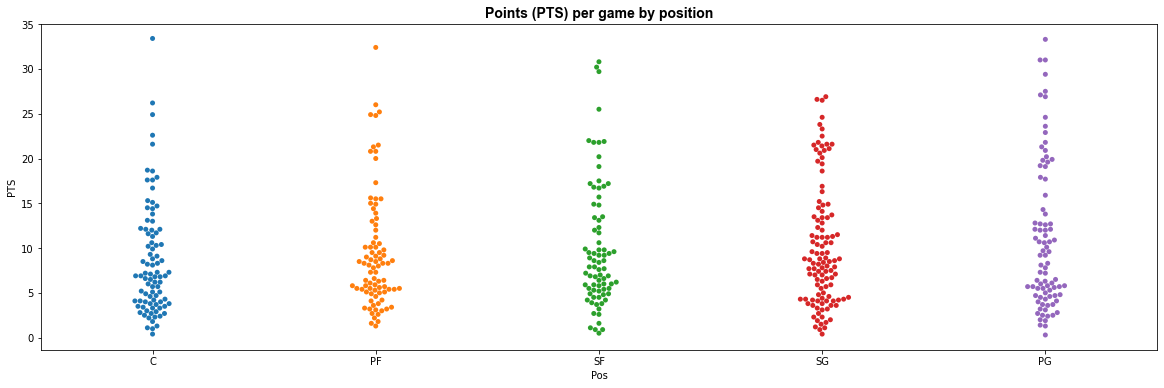

In [20]:
# create a swarmplot of points per game of players for each position 
plt.figure(figsize=(20,6))
sns.swarmplot(x=players["Pos"],
y=players["PTS"],
order=['C','PF','SF','SG','PG'])   
plt.title("Points (PTS) per game by position", fontsize=14, fontname='Arial', weight='bold')
plt.show()

The **average points** per game between the **C's** and **PF's** were **lower** than **10.0**, contrarily both guard positions and small forwards were higher than 10.0. **SF's** being **10.1**, **SG's** being **10.2** and **PG's** being **11.0**. This likely due to guards’ high usage rate, as they are required to handle the ball the most, which leads to better and more frequent scoring opportunities. The swarm plot for this data contradicts this reasoning as it shows the top scorers in the SG position are not among those in other positions, meaning their high PTS average overall is due to distribution being concentrated between **6.0 to 13.0 PTS** unlike other positions. Other positions have few anomalies that improve their average PTS, however the PG position is by far the most uniformly dispersed and includes many of the best scorers in the entire league, therefore proving how valuable the position is.

### 4.3. Average total rebounds per game for each position

In [21]:
# display the mean total rebounds per game of players for each position 
print("Average Center TRB: " + "\033[1m" + str(round(players_C.TRB.mean(), 1)) + "\033[0m")  
print("Average Power Forward TRB: " + "\033[1m" + str(round(players_PF.TRB.mean(), 1)) + "\033[0m") 
print("Average Small Forward TRB: " + "\033[1m" + str(round(players_SF.TRB.mean(), 1)) + "\033[0m")
print("Average Shooting Guard TRB: " + "\033[1m" + str(round(players_SG.TRB.mean(), 1)) + "\033[0m")  
print("Average Point Guard TRB: " + "\033[1m" + str(round(players_PG.TRB.mean(), 1)) + "\033[0m")  

Average Center TRB: 5.7
Average Power Forward TRB: 4.4
Average Small Forward TRB: 3.5
Average Shooting Guard TRB: 2.7
Average Point Guard TRB: 2.9


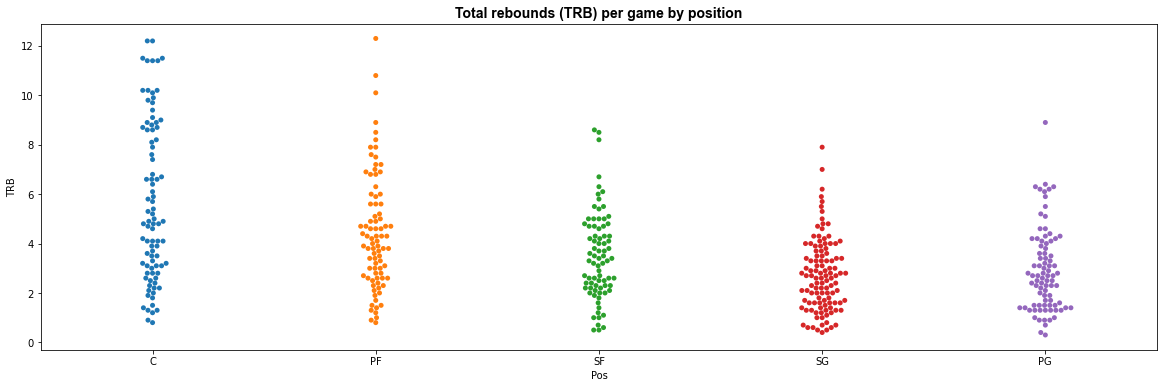

In [22]:
# create a swarmplot of total rebounds per game of players for each position 
plt.figure(figsize=(20,6))
sns.swarmplot(x=players["Pos"],
y=players["TRB"],
order=['C','PF','SF','SG','PG'])
plt.title("Total rebounds (TRB) per game by position", fontsize=14, fontname='Arial', weight='bold')
plt.show()

The **average total rebounds** per game between the **SF**, **SG** and **PG** positions were **lower or equal** to **3.5** but the **C** and **PF** positions bolstered averages **higher** than **4.0**. An explanation for this is very simple, they are larger in size and reside in the paint just under the basket, so they are expected to box out and grab the most rebounds for their team. The swarm plot for this data shows that rebounding between C's and PF’s is very scattered, C’s retain that evenness throughout but PF’s are unable to maintain around the **9.0 to 12.0** region. SF, SG and PG rebounding is very compact in the **1.0 to 5.0** with very few anomalies. High rebounding yet again proves how important the C and PF positions are to winning basketball games as it allows their team to regain possession or take advantage of second chance opportunities, which ultimately leads to points scored.

### 4.4. Average assists per game for each position

In [23]:
# display the mean assists per game of players for each position 
print("Average Center AST: " + "\033[1m" + str(round(players_C.AST.mean(), 1)) + "\033[0m")  
print("Average Power Forward AST: " + "\033[1m" + str(round(players_PF.AST.mean(), 1)) + "\033[0m") 
print("Average Small Forward AST: " + "\033[1m" + str(round(players_SF.AST.mean(), 1)) + "\033[0m")
print("Average Shooting Guard AST: " + "\033[1m" + str(round(players_SG.AST.mean(), 1)) + "\033[0m")  
print("Average Point Guard AST: " + "\033[1m" + str(round(players_PG.AST.mean(), 1)) + "\033[0m")  

Average Center AST: 1.4
Average Power Forward AST: 1.7
Average Small Forward AST: 1.8
Average Shooting Guard AST: 2.1
Average Point Guard AST: 4.1


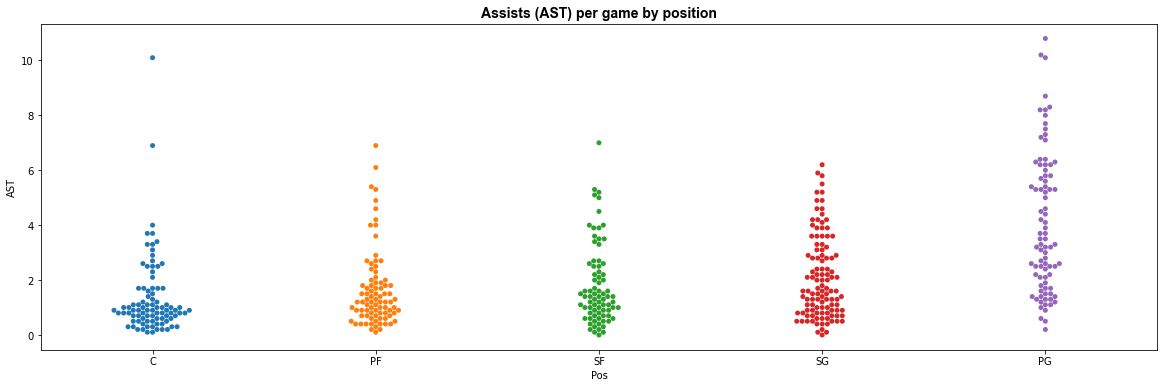

In [24]:
# create a swarmplot of assists per game of players for each position 
plt.figure(figsize=(20,6))
sns.swarmplot(x=players["Pos"],
y=players["AST"],
order=['C','PF','SF','SG','PG'])   
plt.title("Assists (AST) per game by position", fontsize=14, fontname='Arial', weight='bold')
plt.show()

The **average assists** per game between the **C**, **PF**, **SF** and **SG** positions were lower or equal to **2.1** but for **PG’s** was as high as **4.1**. The primary role of point guards is to handle the ball and provide their teammates with the best scoring opportunities, so it is not surprising their assist numbers are this high. The swarm plot for this data shows that assists are compact around the **0.0 to 4.0** for all positions except PG, which compactness extends to **6.5**. There are many outliers in the C and PF positions, this is likely due to many top players drawing double teams in the post and finding wide open teammates. The plots for the PG position in this swarm plot are spread out uniformly throughout the graph as expected, with the highest plot being around **11.0**. It is consensus that it is virtually impossible to win an NBA championship without a good playmaker and more specifically a PG, as they act as composers for their team’s offense.

### 4.5. Average personal fouls per game for each position

In [25]:
# display the mean personal fouls per game of players for each position 
print("Average Center PF: " + "\033[1m" + str(round(players_C.PF.mean(), 1)) + "\033[0m")  
print("Average Power Forward PF: " + "\033[1m" + str(round(players_PF.PF.mean(), 1)) + "\033[0m") 
print("Average Small Forward PF: " + "\033[1m" + str(round(players_SF.PF.mean(), 1)) + "\033[0m")
print("Average Shooting Guard PF: " + "\033[1m" + str(round(players_SG.PF.mean(), 1)) + "\033[0m")  
print("Average Point Guard PF: " + "\033[1m" + str(round(players_PG.PF.mean(), 1)) + "\033[0m")  

Average Center PF: 2.1
Average Power Forward PF: 1.9
Average Small Forward PF: 1.8
Average Shooting Guard PF: 1.6
Average Point Guard PF: 1.7


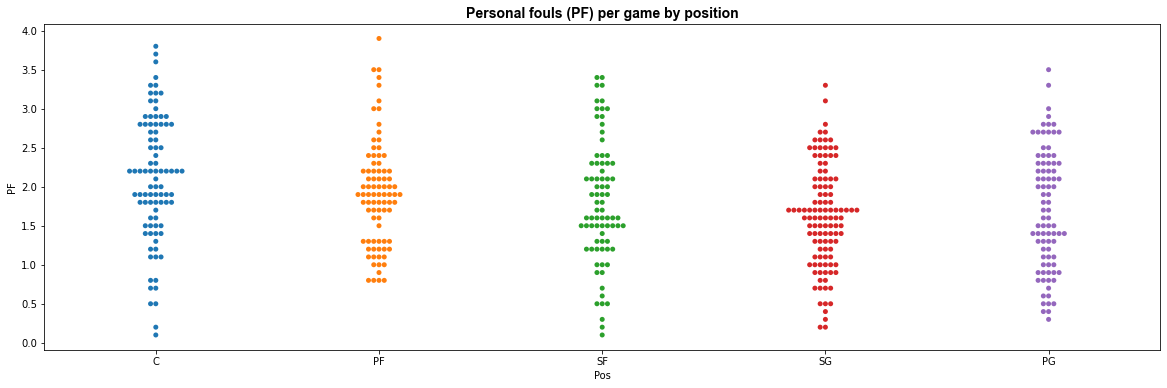

In [26]:
# create a swarmplot of personal fouls per game of players for each position 
plt.figure(figsize=(20,6))
sns.swarmplot(x=players["Pos"],
y=players["PF"],
order=['C','PF','SF','SG','PG'])   
plt.title("Personal fouls (PF) per game by position", fontsize=14, fontname='Arial', weight='bold')
plt.show()

The **average personal fouls** per game between the **PF**, **SF** and **SG** and **PG** positions, were lower or equal to **1.9** but for **C’s** was as high as **2.1**. This was as expected as centers are tasked with anchoring the teams defence, which involves guarding the paint and the basket. Due to the NBA evolving into a league that is obsessed with three point scoring, wings and guards are not called for as many fouls as centers due to referees calling less fouls on perimeter defenders as opposed to interior defenders. The swarm plot for this data shows that personal fouls are clustered around each position individual means. There is not a single **PF** in the league which does not average **less than 0.7**, this may infer that they are unfairly officiated or are too rash in their defending as they are considered roamers and help defenders. For the most part each positions plots are even spread out, but there are many outliers are the **3.6 to 3.9** range in the C and PF positions, this is likely due to many of top shot blockers taking risks in attempting to contest tough shots, or the unfortunate reality that players in this position are targets to the best foul baiters in the league. It takes **6 fouls** in a game for a player to ejected from an NBA game. By observing the underlying numbers behind personal fouls, it can be concluded that the usefulness of the C and PF positions can be questioned if they constantly must be taken out of the game and play less minutes due to foul trouble.

### 4.6. Average true scoring percentage per game for each position

In [27]:
# display the mean true scoring percentage of players for each position 
print("Average Center TS%: " + "\033[1m" + str(round(players_C['TS%'].mean(), 2)) + "\033[0m")
print("Average Power Forward TS%: " + "\033[1m" + str(round(players_PF['TS%'].mean(), 2)) + "\033[0m")
print("Average Small Forward TS%: " + "\033[1m" + str(round(players_SF['TS%'].mean(), 2)) + "\033[0m")
print("Average Shooting Guard TS%:: " + "\033[1m" + str(round(players_SG['TS%'].mean(), 2)) + "\033[0m")
print("Average Point Guard TS%:: " + "\033[1m" + str(round(players_PG['TS%'].mean(), 2)) + "\033[0m")


Average Center TS%: 0.62
Average Power Forward TS%: 0.58
Average Small Forward TS%: 0.56
Average Shooting Guard TS%:: 0.55
Average Point Guard TS%:: 0.54


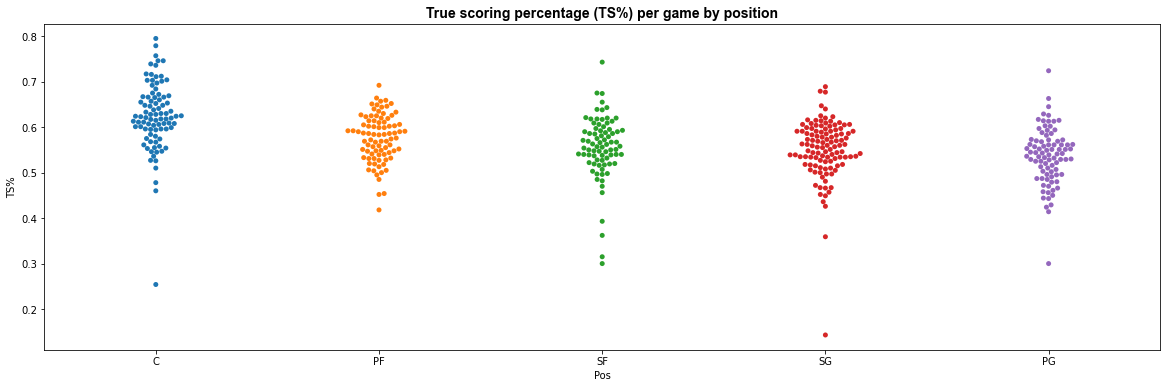

In [28]:
# Create a swarmplot of true scoring percentage of players for each position
plt.figure(figsize=(20, 6))
sns.swarmplot(x=players["Pos"], y=players["TS%"], order=['C', 'PF', 'SF', 'SG', 'PG'])
plt.title("True scoring percentage (TS%) per game by position", fontsize=14, fontname='Arial', weight='bold')
plt.show()

The **average TS%** per game between **all positions** is **0.54 to 0.62**. The swarm plot for this data shows that C’s overall provide the highest average TS% in the league with their highest producer averaging around **0.80**, this is logically due to C’s having less shooting range and taking less jump shots compared to other positions, despite this statistic favouring the conversion of three point shots. All positions swarm plots are concentrated and rigid around their averages with few low-end outliers. High TS% is the purest form of proving shooting efficiency in basketball. This demonstrates that having a high scoring center with a high TS% may be the best way to get the most offensive output from one player on a team without external factors such as influence from the quality of their teammates. This has massively contributed to **Nikola Jokic** winning MVP in back-to-back years along with two first team All-NBA selections in the same time span.

### 4.7. Average efficiency rating per game for each position

In [29]:
# display the mean efficiency rating  of players for each position 
print("Average Center EFF: " + "\033[1m" + str(round(players_C.EFF.mean(), 1)) + "\033[0m")  
print("Average Power Forward EFF: " + "\033[1m" + str(round(players_PF.EFF.mean(), 1)) + "\033[0m") 
print("Average Small Forward EFF: " + "\033[1m" + str(round(players_SF.EFF.mean(), 1)) + "\033[0m")
print("Average Shooting Guard EFF: " + "\033[1m" + str(round(players_SG.EFF.mean(), 1)) + "\033[0m")  
print("Average Point Guard EFF: " + "\033[1m" + str(round(players_PG.EFF.mean(), 1)) + "\033[0m")  

Average Center EFF: 12.7
Average Power Forward EFF: 11.3
Average Small Forward EFF: 10.6
Average Shooting Guard EFF: 9.8
Average Point Guard EFF: 12.2


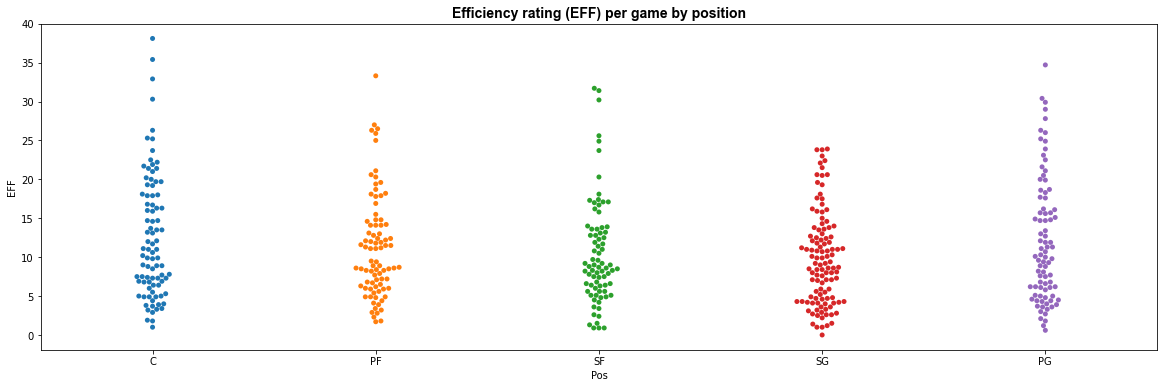

In [30]:
# create a swarmplot of efficiency rating of players for each position 
plt.figure(figsize=(20,6))
sns.swarmplot(x=players["Pos"],
y=players["EFF"],
order=['C','PF','SF','SG','PG'])
plt.title("Efficiency rating (EFF) per game by position", fontsize=14, fontname='Arial', weight='bold')
plt.show()

The **average efficiency rating** per game between the **SG**, **SF** and **PF** positions differed between **9.8 to 11.3** respectively, whereas **C’s** provided an average of **12.7** and **PG’s** provided an average of **12.2**. I believe that this may be due to C’s and PG’s being the focal point of most teams in the NBA, defensively and offensively. Efficiency is a fantastic measure of showing how valuable a player is on both ends of the court as most, if not all, standard statistics are used to calculate it. Our swarm plot is spread very evenly across all positions up to the **25.0**, except for SF's which becomes less clustered around **20.0**. High-end outliers specifically in the C, PF and PG positions are very noticeable. The main aim of winning basketball games is to make the most out of the possessions you have in the game, being efficient allows you do that, hence proving this metrics importance.

### 4.8. Data correlation between statistics

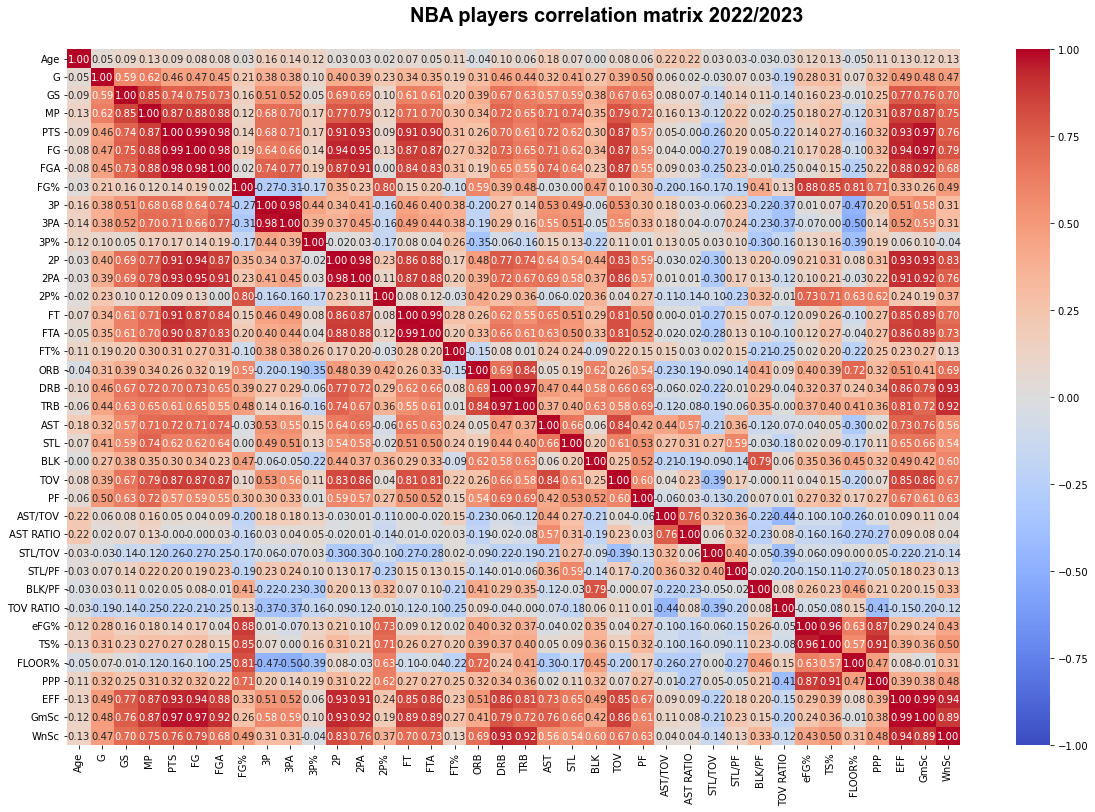

In [31]:
# create a heatmap showing whether variables in this DataFrame are correlated
frame, ax = plt.subplots(figsize=(20, 12))
corr = players.corr()
NBA_hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', vmin=-1, vmax=1)
frame.subplots_adjust(top=0.93)
title = frame.suptitle("NBA players correlation matrix 2022/2023", fontsize=20, fontname='Arial', weight='bold')

**High Positive Correlation:**
* PTS & FG (**0.99**)
* EFF & GmSc (**0.99**)
* PTS & FGA (**0.98**)
* TRB & DRB (**0.97**)
* PTS & GmSc (**0.97**)
* TS% & eFG% (**0.96**)
* EFF & FG (**0.94**)
* EFF & WnSc (**0.94**)
* PTS & 2PA (**0.93**)
* PTS & EFF (**0.93**)
* EFF & 2P (**0.93**)
* TRB & WnSc (**0.92**)
* PTS & 2P (**0.91**)
* PTS & FT (**0.91**)
* TS% & PPP (**0.91**)
* EFF & 2PA (**0.91**)
* PTS & FTA (**0.90**)
* AST & TOV (**0.84**)

**High Negative Correlation:**
* N/A

I have selected and listed statistics that have **high positive or high negative correlation** to each other. To fit the criteria of high positive correlation, correlation must be **0.90 or above**, one relationship (**AST & TOV**) is included as an outlier to help me display how important assists are in determining player value. To be considered to have a highly negative correlation, correlation must be **-0.90 or below**, no relationships in this dataset satisfied this criterion, as expected. The most positively correlated relationship was between **PTS and FG** at **0.99**, this was anticipated as it is impossible to gain a field goal on a player’s box score without scoring points. The least positively correlated relationship was between **AST and TOV** at **0.84**. Both statistics are commonly grouped together, as shown by the creation of the statistic AST/TOV. A higher AST/TOV usually means more ball control, controlling the ball well often will lead to more wins. Key findings when observing these relationships include, **EFF** being high positively correlated with six other metrics yet again proves its significance in valuing player impact towards winning as it is only behind PTS in this category. This is reinforced by its **0.94** correlation to **WnSc**. Another observation includes a **0.91** correlation between **TS%** and **PPP**, this recurringly fortifies that being methodical with the basketball, especially with shot selection will lead to better offensive long term for not only star players but for entire teams. Furthermore, a defensive metric in **TRB** being so positively correlated to **WnSc** at **0.92** promotes that being excellent defensively in the NBA can potentially shift momentum for your team offensively, which leads to winning basketball.

### 4.9. Visualisation of correlation between major offensive statistics

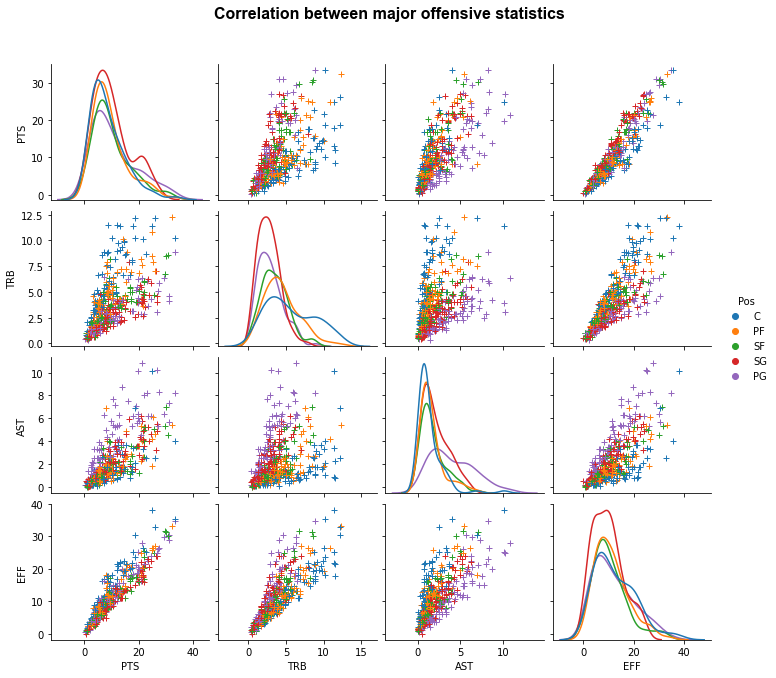

In [32]:
# create pairplots of highly correlated offensive statistics
players.reset_index(drop=True, inplace=True)
NBA_off = players[['Pos', 'PTS', 'TRB', 'AST', 'EFF']].copy()
order = ['C', 'PF', 'SF', 'SG', 'PG']
g = sns.pairplot(
    NBA_off, hue='Pos', hue_order=order,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False))
g.fig.subplots_adjust(top=0.9, bottom=0.1)
g.fig.suptitle("Correlation between major offensive statistics", fontsize=16, fontname='Arial', weight='bold')
plt.show()


To further visualise relationships between statistics in this dataset, I have created several pair plots for what I consider the best individual statistics in determining a player’s effectiveness on a basketball court. Each pair plot shows the impact of players in each position. Firstly, when statistics are plotted against each other **SG’s** produce the highest values, notably PTS peaking at **33.4** and EFF peaking at **38.1**, the only statistic this is not the case for is for AST. However, these values plateau very quickly, therefore I can deduce that there is clearly a massive skill gap between All-NBA calibre SGs and sporadic SGs. This proves to me that SG’s impact on winning may be considered overvalued, despite their sole purpose being to score. **EFF** tends to have a strong positive relationship with everything, expected as all other statistics in these pair plots are used to calculate it. **EFF and PTS** have the most linear relationship between all statistics, but C’s produce less PTS for the same EFF compared to the other 4 positions. Very interestingly for the highest producer in PTS (**33.4**) is also the second highest producer in EFF (**35.4**), they also happen to be a center (**Joel Embiid**).  When **EFF** is plotted against **TRB**, plots are more scattered in comparison to EFF and PTS but a positive correlation between the two is still present. PF’s and C’s produce the best values for this plot due to their high rebounding. The highest producer in EFF (**38.1**) is also the third best rebounder in the league (**11.4**), this player is yet again a center (**Nikola Jokic**). The relationship between **EFF** and **AST** is very positive for all 5 positions. AST plots have the lowest overall count proving its difficulty.  Unsurprisingly, PG’s have the strongest positive correlation due to their high amount of AST, and C’s have the weakest positive correlation as assisting other players is not their priority. Despite this, highest producer in EFF (**38.1**) is also the third best playmaker in the league with **10.1** AST. 

The outcome of these pair plots provides even more evidence that the center position is the most valuable position in the modern NBA due to them being top performers in each category. These pair plots also show that for our prediction model, a player must produce minimum number of some statistics to make an All-NBA team. For C’s and PFs, this will be TRB. For PG’s this will be AST. For SG’s, PTS will be the only requirement as that is their speciality. SF’s will not have a requirement as they are a very all-around position. For all positions, EFF will have a minimum requirement as throughout this project I have deemed it the most important statistic at showing player impact from this dataset. By pairing a minimum PTS and EFF requirement it should be relatively simple to find and predict the best three players in each position this season.

### 4.10. 95th, 90th and 85th percentile of major offensive statistics

In [33]:
# calculate the 95th percentile of PTS for each position
pts_c = players_C['PTS'].values
pts_c_95th = np.percentile(pts_c, 95)
print("95th percentile of PTS for Centers: " + "\033[1m" + str(pts_c_95th.round(1)) + "\033[0m")

pts_pf = players_PF['PTS'].values
pts_pf_95th = np.percentile(pts_pf, 95)
print("95th percentile of PTS for Power Forwards: " + "\033[1m" + str(pts_pf_95th.round(1)) + "\033[0m")

pts_sf = players_SF['PTS'].values
pts_sf_95th = np.percentile(pts_sf, 95)
print("95th percentile of PTS for Small Forwards: " + "\033[1m" + str(pts_sf_95th.round(1)) + "\033[0m")

pts_sg = players_SG['PTS'].values
pts_sg_95th = np.percentile(pts_sg, 95)
print("95th percentile of PTS for Shooting Guards: " + "\033[1m" + str(pts_sg_95th.round(1)) + "\033[0m")

pts_pg = players_PG['PTS'].values
pts_pg_95th = np.percentile(pts_pg, 95)
print("95th percentile of PTS for Point Guards: " + "\033[1m" + str(pts_pg_95th.round(1)) + "\033[0m")

95th percentile of PTS for Centers: 20.4
95th percentile of PTS for Power Forwards: 24.1
95th percentile of PTS for Small Forwards: 22.3
95th percentile of PTS for Shooting Guards: 22.9
95th percentile of PTS for Point Guards: 27.4


In [34]:
# calculate the 85th percentile of TRB for Cs and PFs
trb_c = players_C['TRB'].values
trb_c_85th = np.percentile(trb_c, 85)
print("85th percentile of TRB for Centers: " + "\033[1m" + str(trb_c_85th.round(1)) + "\033[0m")

trb_pf = players_PF['TRB'].values
trb_pf_85th = np.percentile(trb_pf, 85)
print("85th percentile of TRB for Power Forwards: " + "\033[1m" + str(trb_pf_85th.round(1)) + "\033[0m")

85th percentile of TRB for Centers: 9.6
85th percentile of TRB for Power Forwards: 6.9


In [35]:
# calculate the 98th percentile of AST for PGs
ast_pg = players_PG['AST'].values
ast_pg_85th = np.percentile(ast_pg, 85)
print("85th percentile of AST for Point Guards: " + "\033[1m" + str(ast_pg_85th.round(1)) + "\033[0m")

85th percentile of AST for Point Guards: 6.6


In [36]:
# calculate the 90th percentile of EFF for each position
eff_c = players_C['EFF'].values
eff_c_90th = np.percentile(eff_c, 90)
print("90th percentile of EFF for Centers: " + "\033[1m" + str(eff_c_90th.round(1)) + "\033[0m")
      
eff_pf = players_PF['EFF'].values
eff_pf_90th = np.percentile(eff_pf, 90)
print("90th percentile of EFF for Power Forwards: " + "\033[1m" + str(eff_pf_90th.round(1)) + "\033[0m")
      
eff_sf = players_SF['EFF'].values
eff_sf_90th = np.percentile(eff_sf, 90)
print("90th percentile of EFF for Small Forwards: " + "\033[1m" + str(eff_sf_90th.round(1)) + "\033[0m")

eff_sg = players_SG['EFF'].values
eff_sg_90th = np.percentile(eff_sg, 90)
print("90th percentile of EFF for Shooting Guards: " + "\033[1m" + str(eff_sg_90th.round(1)) + "\033[0m")

eff_pg = players_PG['EFF'].values
eff_pg_90th = np.percentile(eff_pg, 90)
print("90th percentile of EFF for Point Guards: " + "\033[1m" + str(eff_pg_90th.round(1)) + "\033[0m")

90th percentile of EFF for Centers: 22.3
90th percentile of EFF for Power Forwards: 20.0
90th percentile of EFF for Small Forwards: 17.5
90th percentile of EFF for Shooting Guards: 19.2
90th percentile of EFF for Point Guards: 24.4


To create the parameters for the prediction model, I have found the **85th percentile** of TRB and AST for PFs and Cs, **90th percentile** of EFF and **95th percentile** of points for all positions. I have selected these parameters based on what I think will output the three best players in each position. A minimum PTS and EFF requirement alone can do this, however the addition of TRB and AST will help shorten the list and remove unworthy candidates. Although there is no minimum requirement of games played to qualify for an All-NBA team, there is a requirement of playing **68%** of the season to qualify for awards such the scoring and assist title. I will implement this 68% threshold as in past years those who have not played many games despite their individual statistics have not been considered for the selection to the any All-NBA team. Since the maximum games played at the release of this dataset is 59, the minimum game threshold will be **40 games**.

### 4.11. Final model predictions of 1st, 2nd and 3rd All-NBA teams for the 2022/2023 Season

In [37]:
# create a model that will output a prediction of each All-NBA team based off various metrics
Cs = pd.DataFrame(players_C[(players_C.G>=38)&(players_C.PTS>=20.4)&(players_C.EFF>=22.3)&(players_C.TRB>=9.6)]).sort_values(by="EFF", ascending=False).reset_index(drop=True).rename(columns={"Player": "Centers"})['Centers'].reset_index(drop=True)
PFs = pd.DataFrame(players_PF[(players_PF.G>=38)&(players_PF.PTS>=24.1)&(players_PF.EFF>=20.0)&(players_PF.TRB>=6.9)]).sort_values(by="EFF", ascending=False).reset_index(drop=True).rename(columns={"Player": "Power Forwards"})['Power Forwards'].reset_index(drop=True)
SFs = pd.DataFrame(players_SF[(players_SF.G>=38)&(players_SF.PTS>=22.3)&(players_SF.EFF>=17.5)]).sort_values(by="EFF", ascending=False).reset_index(drop=True).rename(columns={"Player": "Small Forwards"})['Small Forwards'].reset_index(drop=True)
SGs = pd.DataFrame(players_SG[(players_SG.G>=38)&(players_SG.PTS>=22.9)&(players_SG.EFF>=19.2)]).sort_values(by="EFF", ascending=False).reset_index(drop=True).rename(columns={"Player": "Shooting Guards"})['Shooting Guards'].reset_index(drop=True)
PGs = pd.DataFrame(players_PG[(players_PG.G>=38)&(players_PG.PTS>=27.4)&(players_PG.EFF>=24.4)&(players_PG.AST>=6.6)]).sort_values(by="EFF", ascending=False).reset_index(drop=True).rename(columns={"Player": "Point Guards"})['Point Guards'].reset_index(drop=True)

All_NBA = pd.concat([Cs, PFs, SFs, SGs, PGs], axis=1, join="outer")
All_NBA.index = np.arange(1, len(All_NBA)+1)
All_NBA = All_NBA[['Centers', 'Power Forwards', 'Small Forwards', 'Shooting Guards', 'Point Guards']].head(3)
All_NBA

,Centers,Power Forwards,Small Forwards,Shooting Guards,Point Guards
1,Nikola Jokic,Giannis Antetokounmpo,Kevin Durant,Donovan Mitchell,Luka Doncic
2,Joel Embiid,Julius Randle,LeBron James,Jaylen Brown,Damian Lillard
3,Bam Adebayo,Pascal Siakam,Jayson Tatum,Paul George,Ja Morant


I chose a supervised machine learning model for categorisation and organisation. This was chosen because I wanted a model that would predict distinct outcomes. 

Our results show that **only 3 out of 5** players who made first team All-NBA in the 2021/2022 season are on track to make it again, these players being **Nikola Jokic**, **Giannis Antetokounmpo** and **Luka Doncic**. The exclusion of **Jayson Tatum** and the inclusion of **LeBron James** from this team proves that voters value winning records massively when it comes to the ranking of players in their respective positions. At the time of the release of this dataset the Los Angeles Lakers were below .500 (**27-32**) in win percentage and the Boston Celtics had the best record in the league (**42-17**).

This model predicts that there will be **6 different additions** to All-NBA teams compared to those who were selected last season. Key players like **Anthony Davies**, **Zion Williamson**, **Kevin Durant**, **Devin Booker** and **Stephen Curry** have been left off every team due to playing less than 40 games, this is very realistic as history has shown voters snubbing players who have not featured much during the season. 

By removing the 3-row limitation, it is clear to see that are three more players that satisfy their positions parameters, these three players are **Lauri Markkanen** at PF, and both **Anthony Edwards** and **Zach Lavine** at SG. Each column is ranked from **highest to lowest in terms of EFF**. It is clear to see that although these three players are having excellent seasons, their inefficiency may be a weakness to their teams leading to their exclusion from any All-NBA team.

## 5. CONCLUSION

In conclusion, this machine learning model was able to predict **10 out of 15** correct All-NBA selections (**67%**), as Bam Adebayo, Pascal Siakam, Kevin Durant, Paul George, and Ja Morant were not included. Although the target of **70% was not met**, this model can be deemed as successful as it does not consider human bias and preference. The data collected for this project was taken with 25% of total regular season games not yet played, this has likely led to many of these predicted players not being selected. Bam Adebayo and Pascal Siakam’s teams did not perform up until the end of the season, Kevin Durant and Paul George picked up injuries that ruled them out for most of the remaining season, and Ja Morant’s off court activities led to him getting suspended and essentially blackballed from making All-NBA. Contrary, there are some players included in each team that should not have made it at all or are simply on the wrong team. Steph Curry and LeBron James had missed a large portion of the season due to injury but were still able to make their respective teams due to individual stats and their reputation. This has commonly been a theme for years when it comes to All-NBA voting, so this is not a surprise. Luka Doncic’s Dallas Mavericks failed to make the play-in tournament, but despite this he has made 1st team All-NBA, this proves yet again that voters do not value team success as much as they claim, as regardless of his impressive statistics, Doncic was unable to produce results and play winning basketball with his team. This was also the case for Damian Lillard who averaged more than 30.0 PPG but snuck into 3rd team All-NBA despite his team missing the play-in tournament as well. As claimed very early on in this investigation, **voters prefer players who excite offensively** rather than defensively. This is clear as no player who made an All-Defense NBA team also made All-NBA, however, our machine learning model predicted Bam Adebayo, who made 2nd team All-Defense, to make 3rd team All-NBA. These observations make it very clear that there may need to be a revision of the voting criteria for these teams as many voters show personal preference and bias for their favourite players and those who have earnt their respect over the year. By analysing the dataset, it is clear which are the best statistics at measuring the offensive capabilities of a player are  **PTS**, **AST**, **TRB**, **EFF** and **TS%**. EFF seems to be the most important statistic as it is influenced by 10 different metrics and had a 0.94 correlation with WnSc. Determining the most valuable position in basketball is often considered objective, but by considering the data from the 2022/2023 season, those who play the **Center** position impact winning at the highest level. Throughout the history of the game this position has anchored top level defences, this is the case again as they lead the league in average TRB and BLK. By also producing the most impressive **TS%**, **PPP** and **EFF** as a position in the NBA, Centers contribute to free flowing and highly productive offense as well. As well as this, for the last five seasons each MVP winner has been a center or a player that can play the position (Giannis Antetokounmpo, Nikola Jokic and Joel Embiid), this yet again reinforces how valuable the position is to regular season success.


There are many future obstacles when selecting and predicting All-NBA that need to be overcome. From the 2023/24 season onwards, these All-NBA teams will be **positionless**, this means that the machine learning model created during this project will have to be amended to factor in different metrics than the ones chosen already. It is believed that this change may ruin the integrity of the accolade as it may lead to the favouring of roles and positions, an example of this is already shown by the unappreciation of defensive attributes in the voting of these teams. Moreover, for the first time in NBA history there will be an official number of **minimum games** required to qualify for end of season awards, this threshold has been set at **65 games**. Although this would not have affected our model, this will heavily affect voters’ decisions as those who are unable to stay healthy and have  been favoured in the past such as Kevin Durant, LeBron James, and Kawhi Leonard, may find struggle to be eligible for votes. If I were to amend this model, I would include more data that may be able to quantify how **social media** can impact voters’ ideologies and thought process behind who they give their votes to. Historically, players from teams who are not as popular compared to others have been unfairly left off inclusion from All-NBA teams for simple reasons such as **lack of media presence**. By finding out who are the most watched teams and correlating that with my model I may be able to find out more insights and inferences. Overall, I believe that this investigation was successful, as it has helped me massively in identifying the flaws in the voting process for this accolade. By expanding the datasets and sources, I could add more advanced metrics such as **RAPTOR**, **VORP**, **+/- rating** etc. to fully get the most out of building this type of machine learning model. By looking at the history of NBA player stats, I could study players progression even further to potentially predict the All-NBA teams in **5-10** years to come.